# Supervised Classification:-
<br>


<div>
    <ol>
        <li>Logistic Regrssion</li>
        <li>Naive Based Classification</li>         
        <li>Decision</li>                                              
        <li>Random Forest</li>
        <li>KNN</li>
        <li>SVM</li>
    </ol>
</div>


In [1]:
# see the value of multiple statement at once
# output for all comamnds in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# to suppress the warnnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

# Supervised Alogo comparision

## Loading the winequality_red:-

In [2]:
Red_wine=pd.read_csv(r'C:\Users\ashis\Downloads\python_class\Machine_learning\SVM data\winequality-red.csv' ,sep=';')
Red_wine.head(2)
Red_wine.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


(1599, 12)

## Checking basic property:-

In [3]:
Red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
Red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
Red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## visualize STD for Red wine:-

In [6]:
type(Red_wine.describe())

pandas.core.frame.DataFrame

In [7]:
a=Red_wine.describe().iloc[2].index
b=Red_wine.describe().iloc[2].values

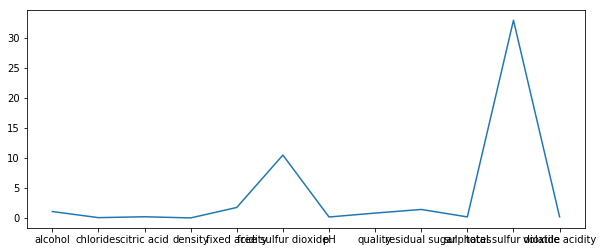

In [8]:
plt.figure(figsize=(10,4))
sns.lineplot(x=a ,y=b);

# Target Variable:- (quality)

In [9]:
Red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Spliting the Dataset:-

In [10]:

x=Red_wine.drop('quality',axis=1)
y=Red_wine['quality']
y.value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
# scaling features
from sklearn.preprocessing import MinMaxScaler
scalr=MinMaxScaler()
scaled_x=scalr.fit_transform(x.values)


## Dividing the labels into 3 instead:-

In [12]:
def quality_cat(y):
    if y>5:
        return 1
    else:
        return 0
cat=y.apply(quality_cat)
cat.value_counts()


1    855
0    744
Name: quality, dtype: int64

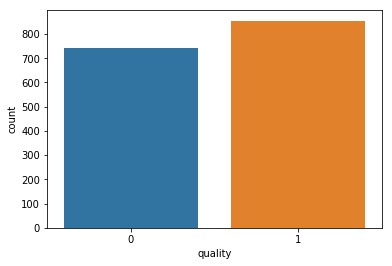

In [13]:
sns.countplot(cat)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,cat,test_size=0.30,random_state=101)
x_train.shape ,y_train.shape

((1119, 11), (1119,))

# 1. Logistic Model :-

In [15]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
log_pred=logistic.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve,auc,roc_auc_score

logistc_acc= round(accuracy_score(y_test,log_pred),2)
print("Logistics Model accuracy",logistc_acc)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Logistics Model accuracy 0.74


# 2. Naive Based Classification

In [16]:
from sklearn.naive_bayes import GaussianNB as GNB
bayes_model=GNB()
bayes_model.fit(x_train,y_train)
naive_pred=bayes_model.predict(x_test)
bayes_acc= round(accuracy_score(y_test,naive_pred),2)
print("Naive bayes Model Accuracy",bayes_acc)

#log=roc_auc_score(y_test,naive_pred)

GaussianNB(priors=None, var_smoothing=1e-09)

Naive bayes Model Accuracy 0.75


# 3.  Decision:-

In [17]:
from sklearn.tree import DecisionTreeClassifier
deci_model=DecisionTreeClassifier()
deci_model.fit(x_train,y_train)
dec_pred=deci_model.predict(x_test)
d_acc= round(accuracy_score(y_test,dec_pred),2)
print("Decision model accuracy",d_acc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision model accuracy 0.76


# 4. Random Forest Model:-

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=20)
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_acc= round(accuracy_score(y_test,rf_pred),2)
print("random forest accuracy",rf_acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

random forest accuracy 0.8


# 5. KNN Model:-

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)
knn_acc=round(accuracy_score(y_test,knn_pred),2)
print("KNN Acuracy", knn_acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNN Acuracy 0.73


# 6. SVM

In [20]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
xs_train=scalar.fit_transform(x_train)
xs_test=scalar.fit_transform(x_test)

In [21]:
from sklearn.svm import SVC
support=SVC(kernel='linear',random_state=0)
support.fit(xs_train,y_train)
svm_pred=support.predict(xs_test)
svm_acc=accuracy_score(y_test,svm_pred)
print("SVM Accuracy:" ,svm_acc)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVM Accuracy: 0.74375


## Tunning Model

### using GridsearchCV for Random Classifier:-

In [22]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

rclf=RandomForestClassifier()
parametre_grid={'n_estimators':[5,10,25,50,100],
               'criterion':['gini','entropy'],
               'max_features':[1,2,3,4],
               'warm_start':[True,False]}
crs_validation= StratifiedKFold(n_splits=10, shuffle=True ,random_state=101)

grid_search=GridSearchCV(rclf,parametre_grid ,cv=crs_validation )


In [23]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 25, 50, 100], 'criterion': ['gini', 'entropy'], 'max_features': [1, 2, 3, 4], 'warm_start': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
print (grid_search.best_estimator_)
grid_search.best_params_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=True)


{'criterion': 'gini',
 'max_features': 2,
 'n_estimators': 50,
 'warm_start': True}

In [25]:
cnf_matrix=confusion_matrix(y_test,log_pred)
cm=pd.DataFrame(cnf_matrix)
cm

,0,1
0,162,70
1,56,192


# ROC_AUC:-

<center><b><u>AUC Details</u></b></center>

In [26]:
FPR1 ,TPR1,_1= roc_curve(y_test,log_pred)
roc_auc1 = auc(FPR1,TPR1)
print('ROC AUC for Logistic :%0.3f' % roc_auc1)

FPR2 ,TPR2,_2 = roc_curve(y_test,naive_pred)
roc_auc2= auc(FPR2,TPR2)
print('ROC AUC for Naive Bayes :%0.3f' % roc_auc2)

FPR3 ,TPR3,_3= roc_curve(y_test,dec_pred)
roc_auc3 = auc(FPR3,TPR3)
print('ROC AUC for decison  :%0.3f' % roc_auc3)

FPR4 ,TPR4,_4= roc_curve(y_test,rf_pred)
roc_auc4 = auc(FPR4,TPR4)
print('ROC AUC for Radom Forest :%0.3f' % roc_auc4)

FPR5 ,TPR5,_5= roc_curve(y_test,knn_pred)
roc_auc5 = auc(FPR5,TPR5)
print('ROC AUC for KNN :%0.3f' % roc_auc5)

FPR6 ,TPR6,_6= roc_curve(y_test,svm_pred)
roc_auc6 = auc(FPR6,TPR6)
print('ROC AUC for SVM :%0.3f' % roc_auc6)


ROC AUC for Logistic :0.736
ROC AUC for Naive Bayes :0.745
ROC AUC for decison  :0.758
ROC AUC for Radom Forest :0.801
ROC AUC for KNN :0.728
ROC AUC for SVM :0.744


<center><b>ROC_AUC_score Details</b></center>

In [27]:
log_score = roc_auc_score(y_test,log_pred)
naive_score = roc_auc_score(y_test,naive_pred)
deci_score= roc_auc_score(y_test,dec_pred)
rf_score=roc_auc_score(y_test,rf_pred)
knn_score = roc_auc_score(y_test,knn_pred)
svm_score=roc_auc_score(y_test,svm_pred)


# Model details into dataframe:-

In [28]:
name=['Logistic' ,'Naive_Bayes','Decision','Random_Forest','KNN','SVM']
accurcy=[logistc_acc,bayes_acc,d_acc,rf_acc,knn_acc,svm_acc]
auc=[roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6]
score=[log_score ,naive_score ,rf_score,deci_score,knn_score,svm_score] 

In [29]:
df=pd.DataFrame()
df['Models_Name']=name
df['Accuracy']=accurcy
df['AUC']=auc
df['ROC_AUC_Score']=score
df



,Models_Name,Accuracy,AUC,ROC_AUC_Score
0,Logistic,0.74000,0.736235,0.736235
1,Naive_Bayes,0.75000,0.744855,0.744855
2,Decision,0.76000,0.758204,0.801237
3,Random_Forest,0.80000,0.801237,0.758204
4,KNN,0.73000,0.727962,0.727962
5,SVM,0.74375,0.743813,0.743813


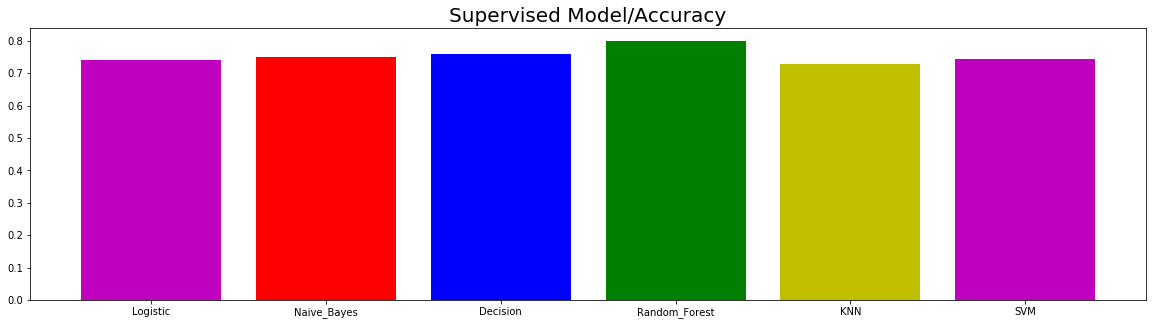

In [30]:
plt.figure(figsize=(20,5))
plt.title("Supervised Model/Accuracy", fontsize=20);
plt.bar(df['Models_Name'], df['Accuracy'] , width=0.8 ,color=('m','r','b','g','y'));

# Plot ROC curve:-

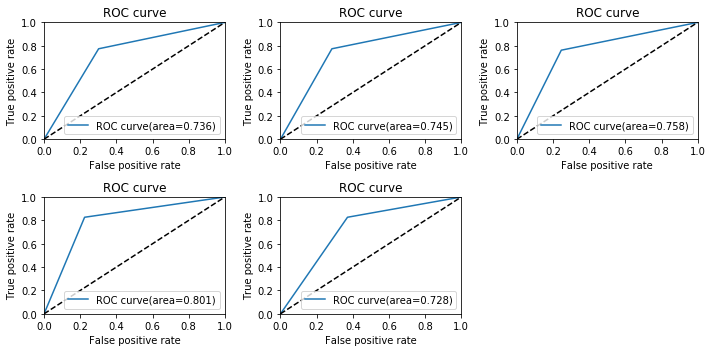

In [31]:
# plot ROC curve
plt.figure(figsize=(10,5))
plt.subplot(231)
plt.plot(FPR1,TPR1, label='ROC curve(area=%0.3f)'% roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right");

plt.subplot(232)
plt.plot(FPR2,TPR2, label='ROC curve(area=%0.3f)'% roc_auc2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right");

plt.subplot(233)
plt.plot(FPR3,TPR3, label='ROC curve(area=%0.3f)'% roc_auc3)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right");


plt.subplot(234)
plt.plot(FPR4,TPR4, label='ROC curve(area=%0.3f)'% roc_auc4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right");

plt.subplot(235)
plt.plot(FPR5,TPR5, label='ROC curve(area=%0.3f)'% roc_auc5)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.tight_layout();

In [32]:
Red_wine_cpy=Red_wine.copy()
Red_wine_cpy.columns=Red_wine_cpy.columns.str.title()
Red_wine_cpy['Quality']=Red_wine_cpy['Quality'].drop([1,2,3,4],axis=0)